Libraries import

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [28]:
data=pd.read_csv('Customer Data.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Data_preprocessing

In [29]:
data.drop(labels='CUST_ID',axis=1,inplace=True)

In [30]:
X=data
X=np.array(X)

In [32]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(X[:, [12,14]])
X[:, [12,14]]=imputer.transform(X[:, [12,14]])

In [33]:
X

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, ...,
        1.39509787e+02, 0.00000000e+00, 1.20000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00, ...,
        1.07234022e+03, 2.22222000e-01, 1.20000000e+01],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02, ...,
        6.27284787e+02, 0.00000000e+00, 1.20000000e+01],
       ...,
       [2.33986730e+01, 8.33333000e-01, 1.44400000e+02, ...,
        8.24183690e+01, 2.50000000e-01, 6.00000000e+00],
       [1.34575640e+01, 8.33333000e-01, 0.00000000e+00, ...,
        5.57556280e+01, 2.50000000e-01, 6.00000000e+00],
       [3.72708075e+02, 6.66667000e-01, 1.09325000e+03, ...,
        8.82889560e+01, 0.00000000e+00, 6.00000000e+00]])

In [67]:
pd.isnull(X)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Import Kmeans cluster and find optimum number of cluster using elbow methode

c:\Users\ggopi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1435: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


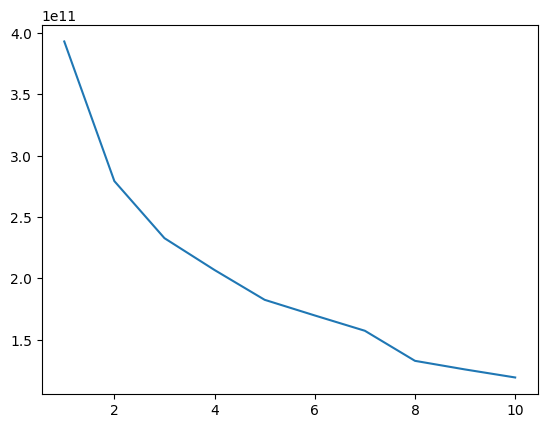

In [42]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmen=KMeans(n_clusters=i,init='k-means++',algorithm='elkan')
    kmen.fit(X)
    wcss.append(kmen.inertia_)
plt.plot(range(1,11),wcss)
 

Fit our Kmeans with 5number of clusters

In [53]:
kmen=KMeans(n_clusters=5,init='k-means++',algorithm='elkan')
y_pred=kmen.fit_predict(X)
y_pred

array([1, 2, 0, ..., 1, 1, 1])

Visualizing the clusters

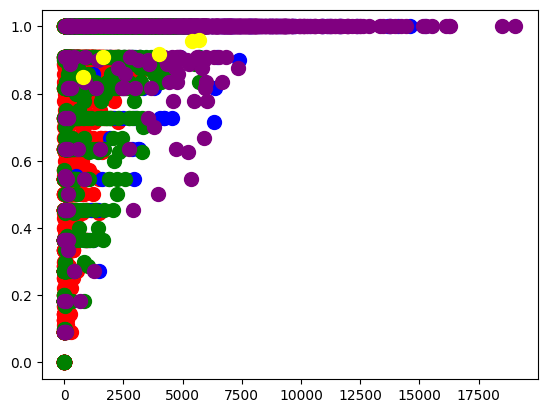

In [50]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c='red', label='cluster1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='blue', label='cluster2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100,c='green', label='cluster3')
plt.scatter(X[y_pred==3,0],X[y_pred==3,1],s=100,c='purple', label='cluster4')
plt.scatter(X[y_pred==4,0],X[y_pred==4,1],s=100,c='purple', label='cluster4')
plt.scatter(kmen.cluster_centers_[:,0],kmen.cluster_centers_[:,1],s=100,c='yellow',label='centroid')
plt.show()

Make a prediction

In [66]:

z=(40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12)
z=np.reshape(z,(1,-1))
kmen.predict(z)

array([1])